### Определение перспективного тарифа для телеком-компании

<p></p>

В вашем распоряжении данные телекоммуникационной компании. Заказчика интересует влияет ли тариф и регион пользователя на выручку. Необходимо проверить несколько гипотез и сформировать рекомендации по дальнейшей рекламной стратегии для тарифов оператора. 

    
***Цели Исследования:***

Можно выделить несколько основных целей:

- ознакомиться с данными и выполнить их предобработку:
  * предварительные выводы
  * переименование колонок
  * обработка пропущенных значений
  * изменение некорректных типов данных
  * приведение к удобным для рассчетов типам данных
  * устранение дубликатов
  * оценить качество данных, проверить на аномалии и выбросы
  * изучить параметры, их особенности и закономерности
- подготовить данные, для каждого пользователя рассчитать по месяцам и создать столбцы с количеством:
  *  сделанных звонков разговора 
  *  израсходованных минут разговора  
  *  отправленных сообщений 
  *  потраченных мегабайт интернет-трафика 
  *  помесячной выручки  
- анализировать поведение среднего пользователя:
  * количество звонков в зависимости от тарифа
  * длительность звонков в зависимости от тарифа
  * число отправленных сообщений в зависимости от тарифа
  * объем израсходованного интернет-трафика в зависимости от тарифа
  * рассчитать характеристики положения данных, построить гистограммы, описать распределения
- проверить гипотезы: 
  * гипотеза_1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
  * гипотеза_2: средняя выручка с пользователей из Москвы отличается от выручки c пользователей других регионов; 
- зафиксировать основной вывод исследования и предоставить общие рекомендации 



### Описание данных: 

<p></p>
<div style="border:solid black 1px; padding: 20px"> Предоставлены данные по пользователям услуг некоторой телекоммуникационной компании. Данные выгружены за период 2018г. по 419 уникальным пользователям из 76 субъектов РФ(Москва, Сочи, Казань, Калининград и др.).<br>
    Имеем следующие таблицы с данными:<br>
    * users - данные о пользователях<br>
    * tariffs - информация о тарифах<br>
    * calls - продолжительность и число звонков<br>
    * messages - количество отправленных сообщений<br>
    * sessions - объем интернет-трафика<br>

Два тарифа:<br>
    <ol>
    <li>Тариф <b>smart</b><br>
        <ul>
       <li>Ежемесячная плата <u>500руб</u><br>
         В тариф входит:<br>
         - 15 ГБ<br>
         - 500 минут<br>
         - 50 смс<br>
       </li>
       <li>Дополнительный пакет:<br>
         - 1 ГБ: 200руб.<br>
         - 1 минута: 3руб. <br>
         - 1 смс: 3руб.<br>
        </li> 
        </ul>   
    </li>
    <li>Тариф <b>ultra</b><br>
        <ul>
       <li> Ежемесячная плата <u>1950руб</u><br>
         В тариф входит:<br>
         - 30 ГБ<br>
         - 3000 минут<br>
         - 1000 смс  <br>
       </li>
       <li> Дополнительный пакет:<br>
         - 1 ГБ: 150руб.<br>
         - 1 минута: 1руб. <br>
         - 1 смс: 1руб.<br>
        </li>
         </ul>
     </li>
     </ol></div>

</div>

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Общая информация

In [2]:
# чтение csv файла с информацией о продолжительности и числе звонков
calls = pd.read_csv('/datasets/calls.csv')

In [3]:
# знакомство с данными
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# вывод основной информации о датафрейме 
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


*В датафрейме 4 колонки: уникальный номер звонка, дата звонка, его продолжительность и идентификатор пользователя.  
Пропущенных значений в таблице нет.  
В столбце duration есть нулевые значения. Скорее всего, на этот звонок не было ответа, то есть он пропущен.  
Колонку call_date следует привести к корректному типу данных для возможности работы с ее значениями.*

In [5]:
# вывод статистических характеристик 
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

*Мы видим, что медиана несильно, но все же меньше средней продолжительности звонка. Значит, в наборе данных много звонков небольшой длительности, распределение ассиметрично.  
Достаточно высокое стандартное отклонение - 5.8. Также мы видим, очень высокое максимальное значение - 38, тогда как медиана равна - 6.  
Из-за продолжительных звонков среднее "ушло" вправо, но таких звонков в выборке мало.*

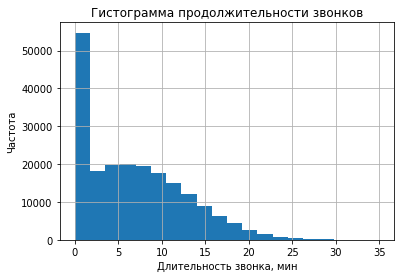

In [6]:
# вывод гистограммы о продолжительности звонков
calls['duration'].hist(bins=20, range=(0,35))
plt.title('Гистограмма продолжительности звонков')
_ = plt.ylabel('Частота')
_ = plt.xlabel('Длительность звонка, мин')
plt.show()

*Гистограмма имеет дополнительные значения справа, то есть набор данных скошен вправо(положительная скошенность).  
Чаще всего в наборе данных встречаются звонки длительностью 0 минут.  
А вот дольше 20 минут пользователя разговаривают достаточно редко.* 

In [7]:
# чтение csv файла с информацией об объеме интернет-трафика
sessions = pd.read_csv('/datasets/internet.csv')

In [8]:
# знакомство с данными
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
# вывод основной информации о датафрейме 
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


*В датафрейме 4 колонки: уникальный номер сессии, объем потраченного трафика в рамках одной сессии(в МБ), дата сессии и идентификатор пользователя.  
Пропущенных значений в таблице нет.  
Колонку session_date следует привести к корректному типу данных для возможности работы с ее значениями.    
Появился столбец Unnamed: 0. Это безымянный индекс, который добавился по умолчанию. Удалим эту колонку позже.* 

In [10]:
# вывод статистических характеристик 
sessions['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Мы видим, что медиана меньше среднего значения. Значит, в наборе данных много сессий с небольшим объемом трафика, распределение ассиметрично.  
Очень высокое стандартное отклонение - 278. Также мы видим, очень высокое максимальное значение - 1724, тогда как медиана равна - 348.  
Из-за сессий с высоким трафиком среднее "ушло" вправо.

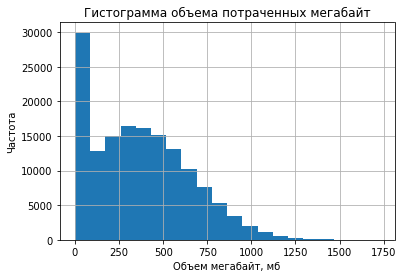

In [11]:
# вывод гистограммы о количестве потраченных мегабайт
sessions['mb_used'].hist(bins=20)
plt.title('Гистограмма объема потраченных мегабайт')
_ = plt.ylabel('Частота')
_ = plt.xlabel('Объем мегабайт, мб')
plt.show()

*Гистограмма имеет дополнительные значения справа, то есть набор данных скошен 
вправо(положительная скошенность), об этом нам говорит "хвост" гистограммы.
Чаще всего в наборе данных встречаются нулевые сессии.  
Также много сессий объемом 300МБ, будем считать, что средняя сессия составляют около 200-400МБ.
А вот сессии объемом больше 1000МБ можно встретить достаточно редко.*

In [12]:
# чтение csv файла с информацией о количестве отправленных сообщений
messages = pd.read_csv('/datasets/messages.csv') 

In [13]:
# знакомство с данными 
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
# вывод основной информации о датафрейме 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


*В датафрейме 3 колонки: уникальный номер сообщения, дата отправки и идентификатор пользователя.  
Пропущенных значений в таблице нет.  
Колонку message_date следует привести к корректному типу данных для возможности работы с ее значениями.*

In [15]:
# чтение csv файла с информацией о тарифах
tariffs = pd.read_csv('/datasets/tariffs.csv') 

In [16]:
# вывод всего датафрейма
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
# вывод основной информации о датафрейме 
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В датафрейме 8 колонок: количество смс в пакете тарифа, объем трафика, число минут и стоимость тарифа, стоимость 1ГБ, 1 смс и 1 минуты сверх тарифного плана и название тарифа.  
Пропущенных значений в таблице нет.  
Типы данных в колонках корректные.  
Датафрейм состоит из 2 строк, то есть двух тарифов.

In [18]:
# чтение csv файла с данными о пользователях
users = pd.read_csv('/datasets/users.csv') 

In [19]:
# знакомство с данными 
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [20]:
# вывод основной информации о датафрейме 
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
# вывод уникальных значения столбца churn_date
users['churn_date'].unique()

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

*Эта колонка содержит даты окончания действия тарифа. Пропущенные значения говорят о том, что тариф еще действует. Заменять такие пропуски не целесообразно, оставим их.*

*В датафрейме 8 колонок: уникальный идентификатор пользователя, его возраст, дата прекращения тарифа, город, имя и фамилия, дата регистрации и выбранный тариф. 
В столбце churn_date есть пропущенные значения, но обработка их не имеет смысла.
Тип данных в колонках churn_date, reg_date следует поменять для корректной работы с данными.*

### Подготовка данных

In [22]:
# обработка столбца reg_date
# обработка столбца churn_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

# обработка столбца call_date
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# обработка столбца message_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# обработка столбца session_date
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')



In [23]:
# проверка изменения типа данных в колонках
# столбцы reg_date, churn_date
print(users[['reg_date', 'churn_date']].dtypes)

# столбец call_date
print(calls[['call_date']].dtypes)

# столбец message_date
print(messages[['message_date']].dtypes)

# столбец session_date
print(sessions[['session_date']].dtypes)

reg_date      datetime64[ns]
churn_date    datetime64[ns]
dtype: object
call_date    datetime64[ns]
dtype: object
message_date    datetime64[ns]
dtype: object
session_date    datetime64[ns]
dtype: object


*Тип данных в колонках успешно изменен. Теперь с датами можно работать, "доставать" нужные нам значения для дальнейшего анализа.*

In [24]:
# округление значений столбца duration с помощью np.ceil() и приведение типа к int
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')


In [25]:
# проверка
calls['duration'].head()

0     0
1     0
2     3
3    14
4     6
Name: duration, dtype: int64

In [26]:
# удаление столбца Unnamed: 0 из датафрейма sessions
sessions = sessions.drop(columns = 'Unnamed: 0')

In [27]:
# проверка удаления
sessions.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Столбец успешно удален:)

In [28]:
# создание столбца month в датафрейме calls
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [29]:
# вывод первых 5 строк для проверки
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [30]:
# создание столбца month в датафрейме messages
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [31]:
# создание столбца month в датафрейме sessions
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month

In [32]:
# подсчёт количества звонков для каждого пользователя по месяцам
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))                                           

In [33]:
# вывод 30 первых строк на экран
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

In [34]:
# подсчёт израсходованных минут для каждого пользователя по месяцам
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum')) 


In [35]:
# вывод первых 30 строк на экран
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

In [36]:
# подсчёт количества отправленных сообщений для каждого пользователя по месяцам
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date','count'))

In [37]:
# вывод первых 30 строк на экран
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

In [38]:
# подсчёт потраченных мегабайт для каждого пользователя по месяцам
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used':'sum'})

In [39]:
# вывод первых 30 строк на экран
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

### Анализ данных и подсчёт выручки

In [40]:
# рассчет доли расторгнутых договоров по столбцу churn_date
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета

In [41]:
# создание датафрейма user_behavior
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Мы получили объединенную таблицу, где поведения каждого пользователя в зависимости от месяца описывают с помощью нескольких параметров: его идентификатор, возраст, город, имя и фамилия, дата регистрации и дата прекращения договора(при наличии), выбранный тариф,количество звонков и их продолжительность, число отправленных смс-сообщений и объем интернет-трафика. 

Проверим пропуски в таблице `user_behavior` после объединения:

In [42]:
# проверка пропусков в user_behavior
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [43]:
# определение доли пропусков от общего числа строк в каждом столбце
pd.DataFrame(round(user_behavior.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
user_id,0.000000
month,0.000000
calls,1.240000
messages,15.460000
mb_used,0.340000
minutes,1.240000
age,0.000000
churn_date,94.180000
city,0.000000
first_name,0.000000


*Видим пропуски в 5 колонках. Колонку churn_date обрабатывать не имеет смысла, так как пропуски говорят нам о том, что договор не расторгнут.  
Значительная доля пропусков в столбце с количеством смс-сообщений, небольшой вес пропущенных значений в колонках с числом и продолжительностью звонков. И всего 0.34% составляют пропуски в столбце с объемом интернет-трафика.  
Скорее всего эти пропуски - нулевые значения, обработаем им, подставим 0 в пустые ячейки.*

Заполним образовавшиеся пропуски в данных:

In [44]:
# заполнение пропусков в столбцах
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Присоединяем информацию о тарифах

In [45]:
# переименование столбца tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [46]:
# объединение user_behavior и tariffs
user_behavior = user_behavior.merge(tariffs, on='tariff')

In [47]:
# вывод user_behavior
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Считаем количество минут разговора, сообщений и мегабайт, превышающих включённые в тариф


In [48]:
# создание новых столбцов с подсчетом минут, смс и мегабайт, превышающих тариф
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

# замена отрицательныхх значений на 0
for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [49]:
# перевод значений столбца paid_gb в гигабайты и изменение типа данных на int
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Считаем выручку за минуты разговора, сообщения и интернет

In [50]:
# подсчет выручки за минуты разговора, сообщения и интернет сверх тарифа
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбце `total_cost`

In [51]:
# подсчет помесячной выручки с каждого пользователя 
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Датафрейм `stats_df` для каждой пары «месяц — тариф» будет хранить основные характеристики

In [52]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

# переименование столбцов
stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Распределение среднего количества звонков по видам тарифов и месяцам

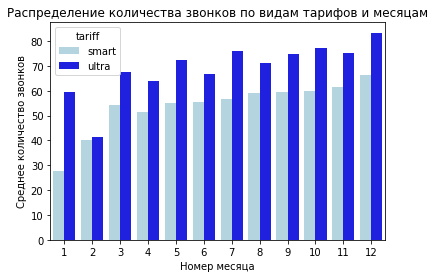

In [53]:
# импорт библиотеки
import seaborn as sns

# создание столбчатой диаграммы
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

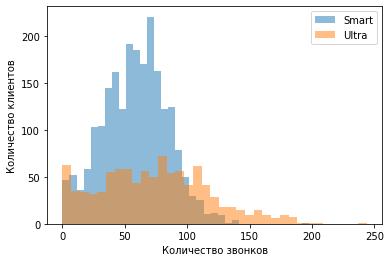

In [54]:
# импорт библиотеки
import matplotlib.pyplot as plt

# создание гистограммы
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

Распределение средней продолжительности звонков по видам тарифов и месяцам

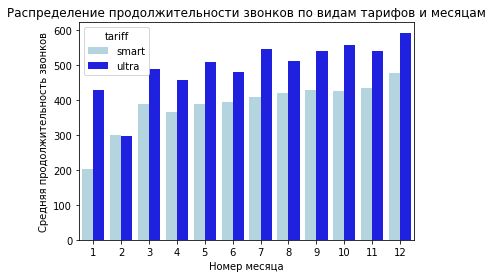

In [55]:
# создание столбчатой диаграммы
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

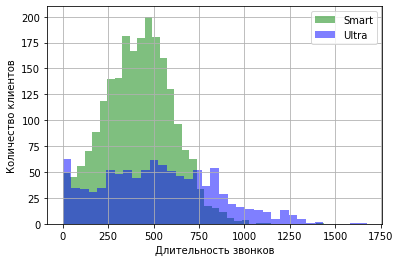

In [69]:
# создание гистограммы
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Длительность звонков')
plt.ylabel('Количество клиентов');

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

В январе у пользователя smart были самые короткие по продолжительности звонки, а у пользователя ultra - в феврале. Вообще стоит отметить, что в феврале отмечается резкое падение длительности звонков в тарифе ultra.  

Распределение среднего количества сообщений по видам тарифов и месяцам

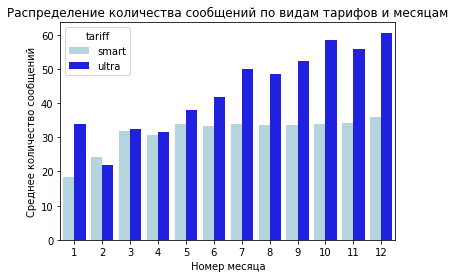

In [72]:
# создание столбчатой диаграммы
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

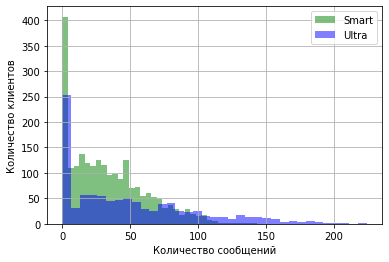

In [70]:
# создание гистограммы
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов');


В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

*Средний пользователь тарифа smart меньше всего сообщений отправлял в январе и феврале. С марта идет тенденция роста, но к маю рост остановился и до конца года среднее число сообщений держится на уровне чуть более 30шт. Основная доля пользователей этим тарифом отправляют до 50смс. Больше 100 сообщений практически никто не посылал. 
Пользователь тарифа ultra меньше всего сообщений отправлял в феврале, этот показатель ниже тарифного плана smart в этом месяце. В марте и апреле число смс в этом тарифмном плане было практически равно числу смс тарифного плана smart, то есть около 30шт. С мая месяца идет положительная динамика, число сообщений растет с каждым месяцем. Больше всего сообщений было отправлено в декабре, более 60шт.  
В этом тарифном плане можно встретить пользователей, которые отправляют более 150смс.*

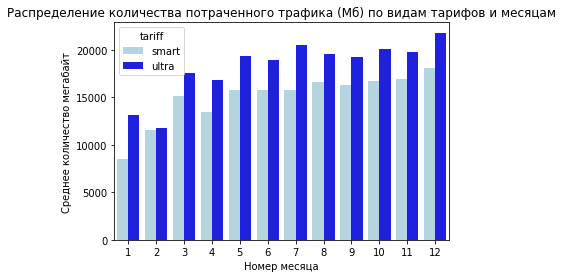

In [59]:
# создание столбчатой диаграммы
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

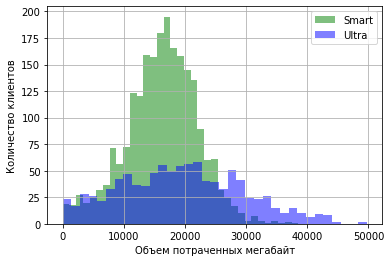

In [71]:
# создание гистограммы
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Объем потраченных мегабайт')
plt.ylabel('Количество клиентов');


Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 ГБ.

*В декабре пользователи обоих тарифов использовали интернет больше всего.  
В феврале объем потраченного трафика был минимален и сравнялся у пользователей обоих тарифов.  
Интернет-трафик тарифа smart имеет линейный рост к концу года, исключение - март, тут отмечен резкий рост. Чего нельзя сказать о другом тарифном плане - ultra. Динамика роста нелинейна и положительна.  
Встречаются пользователи тарифного плана ultra, которые тратят более 25Гб трафика.*

### Проверка гипотез



```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

Нам следует провести статистический тест и сравнить средние двух выборок для проверки двух гипотез. Будем использовать метод st.ttest_ind().  
Рассчитаем p-критерий и сравним его с показателем статистической значимости. Если р-критерий окажется меньше, то отвергнем нулевую гипотезу. Так как это будем говорить нам о том, что отклонение средних друг от друга не случайно, не из-за "шума", такое отклонение значимо.

In [83]:
# проверка размерности выборки с тарифом ultra
len(user_behavior.loc[user_behavior['tariff']=='ultra']['total_cost'])

985

In [87]:
# проверка размерности выборки с тарифом smart
len(user_behavior.loc[user_behavior['tariff']=='smart']['total_cost'])

2229

*Мы видим, что размеры выборок не одинаковы, выборка по тарифу ultra меньше более чем в 2 раза выборки по тарифу smart. Поэтому укажем параметр equal_var=False, говорящий о разном размере дисперсии выборок.*

In [73]:
# импорт библиотеки
from scipy import stats as st

In [ ]:
arr_1 = user_behavior.loc[user_behavior['tariff']=='smart']['total_cost']
arr_2 = user_behavior.loc[user_behavior['tariff']=='ultra']['total_cost']
results = st.ttest_ind(arr_1, arr_2, equal_var=False)  #вызов метода для проверки гипотезы

alpha = .05 # значение уровня значимости
   
# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Действительно, разница между средними имеет не случайный характер, есть значимые различия между выборками. Выручка от пользователей "Ультра" не равна выручке от пользователей "Смарт".



```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

Нам следует провести статистический тест и сравнить средние двух выборок для проверки двух гипотез. Будем использовать метод st.ttest_ind().
Рассчитаем p-критерий и сравним его с показателем статистической значимости. Если р-критерий окажется меньше, то отвергнем нулевую гипотезу. Так как это будем говорить нам о том, что отклонение средних друг от друга не случайно, не из-за "шума", такое отклонение значимо.

In [90]:
# проверка размерности выборки по пользователям из Москвы
len(user_behavior.loc[user_behavior['city']=='Москва']['total_cost'])

611

In [91]:
# проверка размерности выборки по пользователям не из Москвы(любой регион)
len(user_behavior.loc[user_behavior['city']!='Москва']['total_cost'])

2603

Мы видим, что размеры выборок не одинаковы, выборка по пользователям Москвы меньше более чем в 4 раза выборки по пользователям других регионов. Поэтому укажем параметр equal_var=False, говорящий о разном размере дисперсии выборок.

In [92]:
arr_1 = user_behavior.loc[user_behavior['city']=='Москва']['total_cost']
arr_2 = user_behavior.loc[user_behavior['city']!='Москва']['total_cost']

results = st.ttest_ind(arr_1, arr_2, equal_var=False) #вызов метода для проверки гипотезы

alpha = .05 #значение уровня значимости

# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Разница между средними имеет случайный характер, нет значимых различий между выборками. Мы не можем отвергнуть нулевую гипотезу о том, что выручка пользователей из Москвы равна выручке пользователей не из Москвы. С вероятностью около 53% отклонение средних получено случайно.

### Подготовка рекомендаций

In [93]:
# создание столбца с выручкой от превышения лимита
user_behavior['limit_total'] = \
      user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [95]:
# вывод средней переплаты сверх тарифного плана
user_behavior.groupby('tariff').agg({'limit_total':'mean'})

,limit_total
tariff,
smart,739.973531
ultra,120.152284


In [96]:
# вывод средней переплаты за длительность звонка сверх тарифного плана
user_behavior.groupby('tariff').agg({'cost_minutes':'mean'})

,cost_minutes
tariff,
smart,124.816958
ultra,0.000000


In [97]:
# вывод средней переплаты за количество смс сверх тарифного плана
user_behavior.groupby('tariff').agg({'cost_messages':'mean'})

,cost_messages
tariff,
smart,17.399731
ultra,0.000000


In [98]:
# вывод средней переплаты за интернет-трафик сверх тарифного плана
user_behavior.groupby('tariff').agg({'cost_gb':'mean'})

,cost_gb
tariff,
smart,597.756842
ultra,120.152284


In [113]:
# рассчет доли пользователей без переплат за смс по тарифу Смарт
len(user_behavior.loc[(user_behavior['cost_messages']==0) & \
                      (user_behavior['tariff']=='smart')])/\
len(user_behavior.loc[(user_behavior['tariff']=='smart')])




0.746971736204576

In [114]:
# рассчет доли пользователей без переплат за смс по тарифу Ултра
len(user_behavior.loc[(user_behavior['cost_messages']==0) & \
                      (user_behavior['tariff']=='ultra')])/\
len(user_behavior.loc[(user_behavior['tariff']=='ultra')])


1.0

Мы видим, что чаще от переплат "страдают" пользователи тарифа Смарт, особенно им не хватает интернет-трафика.  
А вот смс люди стали отправлять достаточно редко и в меньших количествах. Особенно пользователи пакет Ультра, ни один пользователь не превысил лимит по данному показателю.

## Общий вывод

<p></p>

<div style="border:solid pink 5px; padding: 20px">
    Итак, нами был получен и изучен архив данных телекоммуникационной компании с ее пользователями за 2018г. Прежде чем дать ответ на поставленные перед нами вопросы, был проведен ряд манипуляций с данными.<br>  
    Таблицы с данными были обработаны от пропущенных значений в некоторых столбцах, данные приведены к корректному типу.<br>   
    Люди ведут себя по-разному на разных тарифных планах. Это нормально и естественно.<br>
    При этом пользователи тарифа смарт переплачивают, в среднем около 740руб., особенно людям не хватает интернет-трафика(переплата в среднем 598руб.). Это может привести к оттоку пользователей и разрыву договора. <br>
    В тарифном плане Ультра практически нет переплат. С одной стороны, это хорошо для пользователей, но при этом в данном тарифе 100% пользователей не израсходовали свой лимит по количеству смс. Это упущенная выгода для компании. <br>
    Нами были проверены две гипотезы и выяснилось, что на размер выручки влияет выбранный пользователем тарифный план. И выручка от пользователей из г.Москва равна выручке от пользователей из други регионов РФ. <br>
    Компании стоит пересмотреть и оптимизировать пакеты тарифов. Сделать более гибкие условия для тарифа Смарт, возможно, добавить объем интернет-трафика. А для тарифа Ультра - урезать количество смс, как минимум.

</div>